In [16]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 로지스틱 회귀로 와인 분류하기

In [3]:
wine = pd.read_csv('../Data/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine['class'].unique()

array([0., 1.])

In [6]:
wine.shape

(6497, 4)

In [7]:
# Feature, Target
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
# Train, Test
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [9]:
print('Train :', train_input.shape)
print('Test :', test_input.shape)

Train : (5197, 3)
Test : (1300, 3)


In [10]:
# 정규화
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 로지스틱 회귀 모델
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print('Train :', lr.score(train_scaled, train_target))
print('Test :', lr.score(test_scaled, test_target))

Train : 0.7808350971714451
Test : 0.7776923076923077


In [14]:
# 가중치와 편차 구하기
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


---
### 결정 트리
- 선형회귀나 KNN처럼 전처리 과정이 필요 없다.

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print('Train :', dt.score(train_scaled, train_target))
print('Test :', dt.score(test_scaled, test_target))

Train : 0.996921300750433
Test : 0.8592307692307692


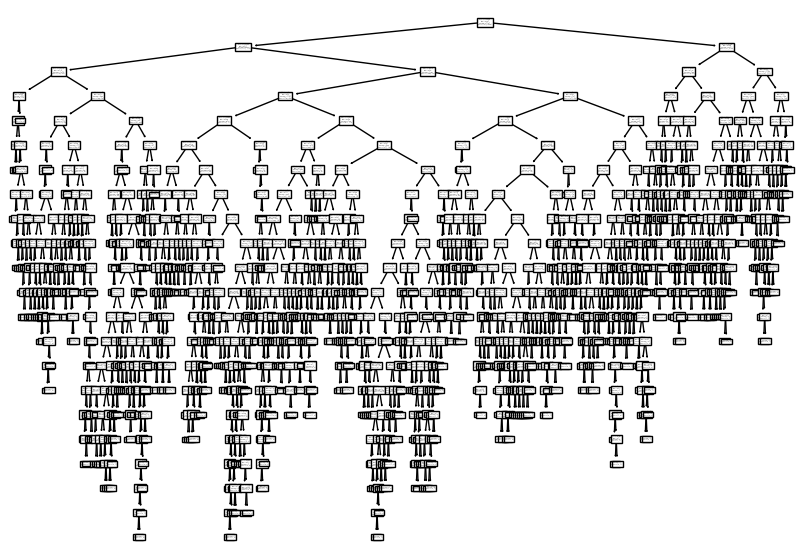

In [17]:
# 시각화
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

> 맨위의 단계를 root node라고 하고 맨 마지막 단계는 leaf node라고 한다.</br>
> 시간이 많이 걸리고 단계가 너무 복잡하다.

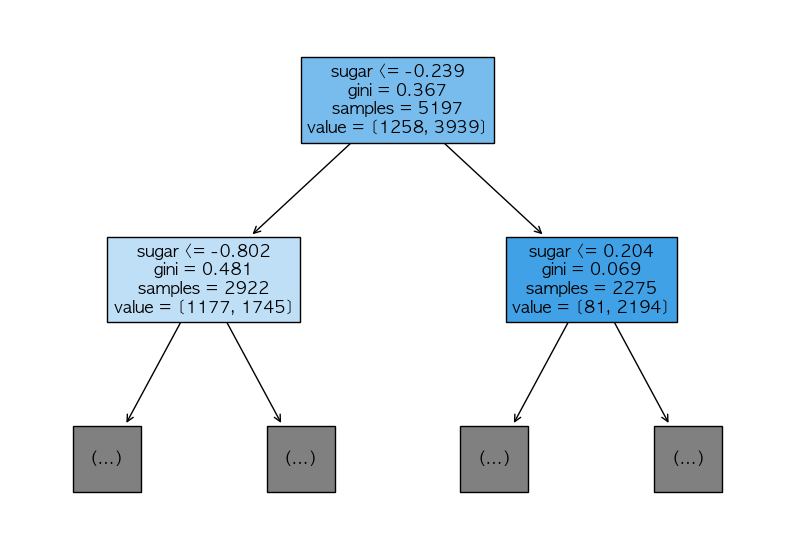

In [18]:
# decision tree의 단계(depth)를 단순하게 하자
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

### 가지치기 (Tree Pruning)
- max_depth의 parameter의 값을 조절한다.
- decision tree의 과대적합을 막는다.

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print('Train :', dt.score(train_input, train_target))
print('Test :', dt.score(test_input, test_target))

Train : 0.8454877814123533
Test : 0.8415384615384616


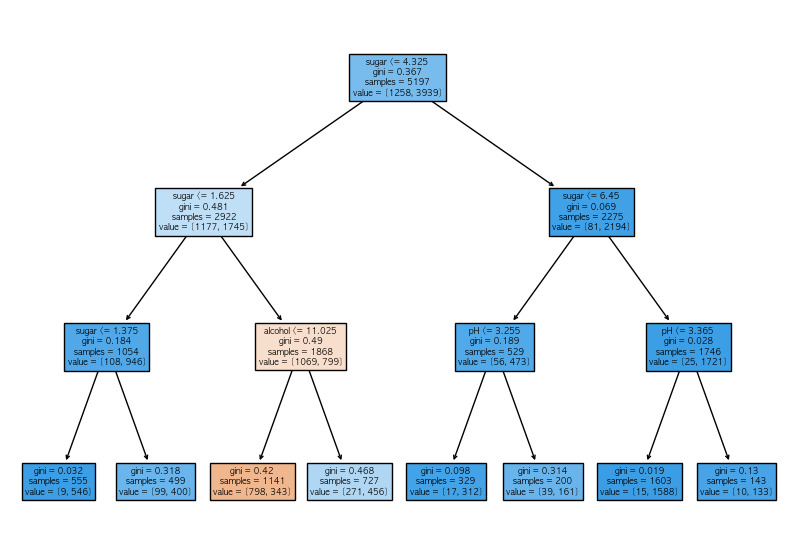

In [20]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
# 특성 중요도
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

### 최적화 시키기

In [22]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42) # 불순도 0.05%
dt.fit(train_input, train_target)

print('Train :', dt.score(train_input, train_target))
print('Test :', dt.score(test_input, test_target))

Train : 0.8874350586877044
Test : 0.8615384615384616


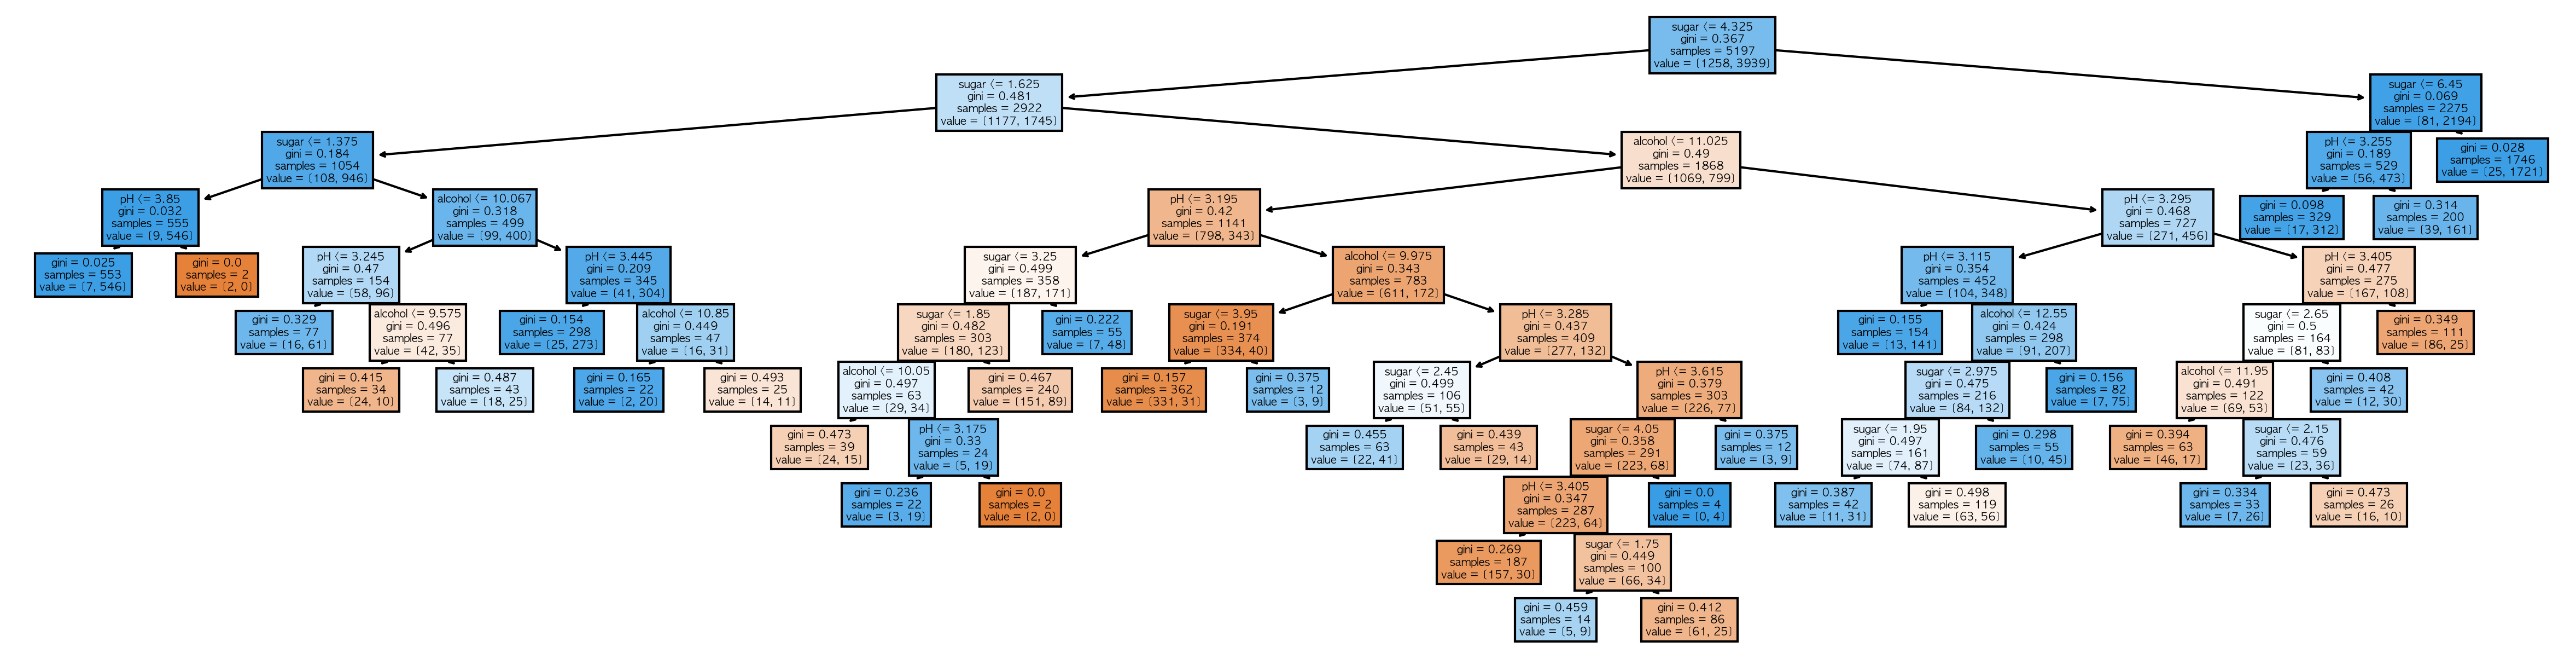

In [24]:
plt.figure(figsize=(20, 5), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.savefig('../Data/wine.jpg')
plt.show()